In [1]:
import csv
import csv, collections, re, math, numpy as np, matplotlib.pyplot as plt


# Spam Filter using Naive Bayes Classifier

You are given a collection of SMS text messages in `sms.csv` as a tab separated CSV file. The first column of this file tells whether the message is a spam or not spam and the second column gives the message. Assume that this dataset is labelled correctly as spam or not spam. We  will use this dataset as the training data to build a spam filter. 

(a) Analyze the dataset and identify top ten spam words and top ten non-spam words  and their frequency counts. Make sure that you first remove articles ("a", "and", "the") and <=4 letter propositions ("for", "off", "in", "from" and so on).  

In [2]:

lst_csv = []
with open('./sms.csv', 'r') as file:
  csv_reader = csv.reader(file, delimiter='\t')
  for row in csv_reader:
    ch = ''
    for string in row[1:]:
      ch += string
    
    lst_csv.append([row[0],ch])



In [3]:

for row in lst_csv:
  if len(row)!=2:
    print(False)
    break
print(True)

True


In [4]:
# for row in lst_csv:
#   print(row)

In [5]:
messages = [
  row[1] for row in lst_csv
]

In [6]:
from collections import Counter

In [7]:
# z = Counter(messages)

In [8]:
message_words = []
abandon_words = set('a an the on at for from in out to and is of my me your have it are that or be with will not can 2 if'.split())

abandon_words_lst = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

abandon_words_lst = [
  h for h in abandon_words_lst if len(h) <=4
]

# if we want to split the dataset to training and testing dataset
# lst_csv, test_set = lst_csv[0:int(0.8 * len(lst_csv))], lst_csv[int(0.8 * len(lst_csv)):]

abandon_words = abandon_words.union(
  set(abandon_words_lst)
)
spam_words = []
non_spam_words = []
for row in lst_csv:
  string = row[1]
  if isinstance(string, str):
    lst = string.split()
    # string = string.strip('$.,/!@#$%^&*()-=_+[]{}1234567890 ')

    lst = [
      word.strip('$.,/!@#$%^&*()-=_+[]{}1234567890£ ') for word in lst
    ]
    lst = [
      word.replace("\'s",'') for word in lst
    ]
    lst = [
      word.strip('\'\"') for word in lst
    ]
    lst = [
      word.lower() for word in lst if word!=''
    ]

    # string = string.lower()
    # z = string.split()
    lst_to_extend = []
    
    for word in lst:
      if word not in abandon_words:
        lst_to_extend.append(word)

    message_words.extend(lst_to_extend)
    if row[0] == 'spam':
      spam_words.extend(lst_to_extend)
    else:
      non_spam_words.extend(lst_to_extend)


In [9]:
# for word in message_words:
#   print(word)
# print(message_words)
z = Counter(message_words)
# print(z)
z.most_common(10)


[('u', 1060),
 ('call', 568),
 ('ur', 381),
 ('get', 375),
 ("i'm", 372),
 ('lt;#&gt;', 275),
 ('go', 270),
 ('free', 268),
 ('ok', 258),
 ('know', 246)]

In [10]:
# import re
# stri = "we's+op hefklj*uh&jj12"
# l = re.findall(r'\w+',stri)
# print(l)

In [11]:
# spam_words

spam_words_count = Counter(spam_words)
non_spam_words_count = Counter(non_spam_words)


In [12]:
# spam_words_count.most_common(10)

(b) Let `W` be the random variable denoting a word and `T` be the random variable denoting a message's type (spam or non-spam). For each of the words `w` (spam or non-spam), estimate the likelihood probabilities (aka the conditional probabilities) `Pr(W = w | T=spam)` and `Pr(W=w | T=non-spam)` as two separate functions. Note  that in order to compute these likelihoods this, you need to compute how many times `w` appears in the corpus (spam or not spam) and the total number of words (including duplicates) in that corpus. If a word does not occur at all, then assign it a non-zero yet small probability fixed suitably. Note that the likelihoods `Pr(w | spam)` and `Pr(w | non-spam)` have to be estimated after suitably removing articles and propositions as done in (a). 

In [13]:

prob_w_given_spam = dict()
prob_w_given_non_spam = dict()
total_spam_words = len(spam_words)
total_non_spam_words = len(non_spam_words)
for word in message_words:
  try:
    # if word present in spam_words
    freq_word = spam_words_count[word]
    prob_w_given_spam[word] = freq_word/total_spam_words
  except:
    # if word not in spam words
    prob_w_given_spam[word] = 0.001

  try:
    # if word present in non_spam_words
    freq_word = non_spam_words_count[word]
    prob_w_given_non_spam[word] = freq_word/total_non_spam_words
  except:
    # if word not in non spam words
    prob_w_given_non_spam[word] = 0.001




In [14]:
print(sum(prob_w_given_non_spam.values()))
print(sum(prob_w_given_spam.values()))

for val in prob_w_given_spam.values():
  if val > 1:
    print(False)
    
for val in prob_w_given_non_spam.values():
  if val > 1:
    print(False)



1.0000000000000593
0.9999999999999731


In [15]:
prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)

(c) Let `M` be the random variable denoting a message (consisting of multiple words). Using the likelihood probabilities calculated in (b), implement a classifier that takes in a new SMS message `m=w1 w2 ... wi` and checks if it is spam or not using the naive Bayes' assumption. That is, compute `P(T=spam | M=m)` and `P(T=non-spam | M=m)` assuming that `P(m | spam) = P(w1 | spam) x P(w2 | spam) x ... x P(wi | spam)` and use this computation to decide if `m` is spam or not. 

In [16]:
def predict_spam_message(message: str, spam_words: list, non_spam_words: list):
  lst_words = message.split()
  lst_words = [
    word.lower() for word in lst_words
  ]
  predict_spam = 1
  predict_non_spam = 1
  
  prob_w_given_spam = dict()
  prob_w_given_non_spam = dict()
  total_spam_words = len(spam_words)
  total_non_spam_words = len(non_spam_words)
  for word in message_words:
    try:
      # if word present in spam_words
      freq_word = spam_words_count[word]
      prob_w_given_spam[word] = freq_word/total_spam_words
    except:
      # if word not in spam words
      prob_w_given_spam[word] = 0.001

    try:
      # if word present in non_spam_words
      freq_word = non_spam_words_count[word]
      prob_w_given_non_spam[word] = freq_word/total_non_spam_words
    except:
      # if word not in non spam words
      prob_w_given_non_spam[word] = 0.001
  prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
  prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)


  for word in lst_words:
    try:
      prob_word_given_spam = prob_w_given_spam[word]
      predict_spam *= prob_word_given_spam
    except:
      predict_spam *= 0.001
    
    try:
      prob_word_given_not_spam = prob_w_given_non_spam[word]
      predict_non_spam *= prob_word_given_not_spam
    except:
      predict_non_spam *= 0.001
    
  predict_spam *= prob_spam
  predict_non_spam *= prob_not_spam

  if predict_spam > predict_non_spam:
    return 'Spam'
  else:
    return 'Not spam'

  

In [17]:

predict_spam_message('call free ur u',spam_words, non_spam_words)



'Spam'

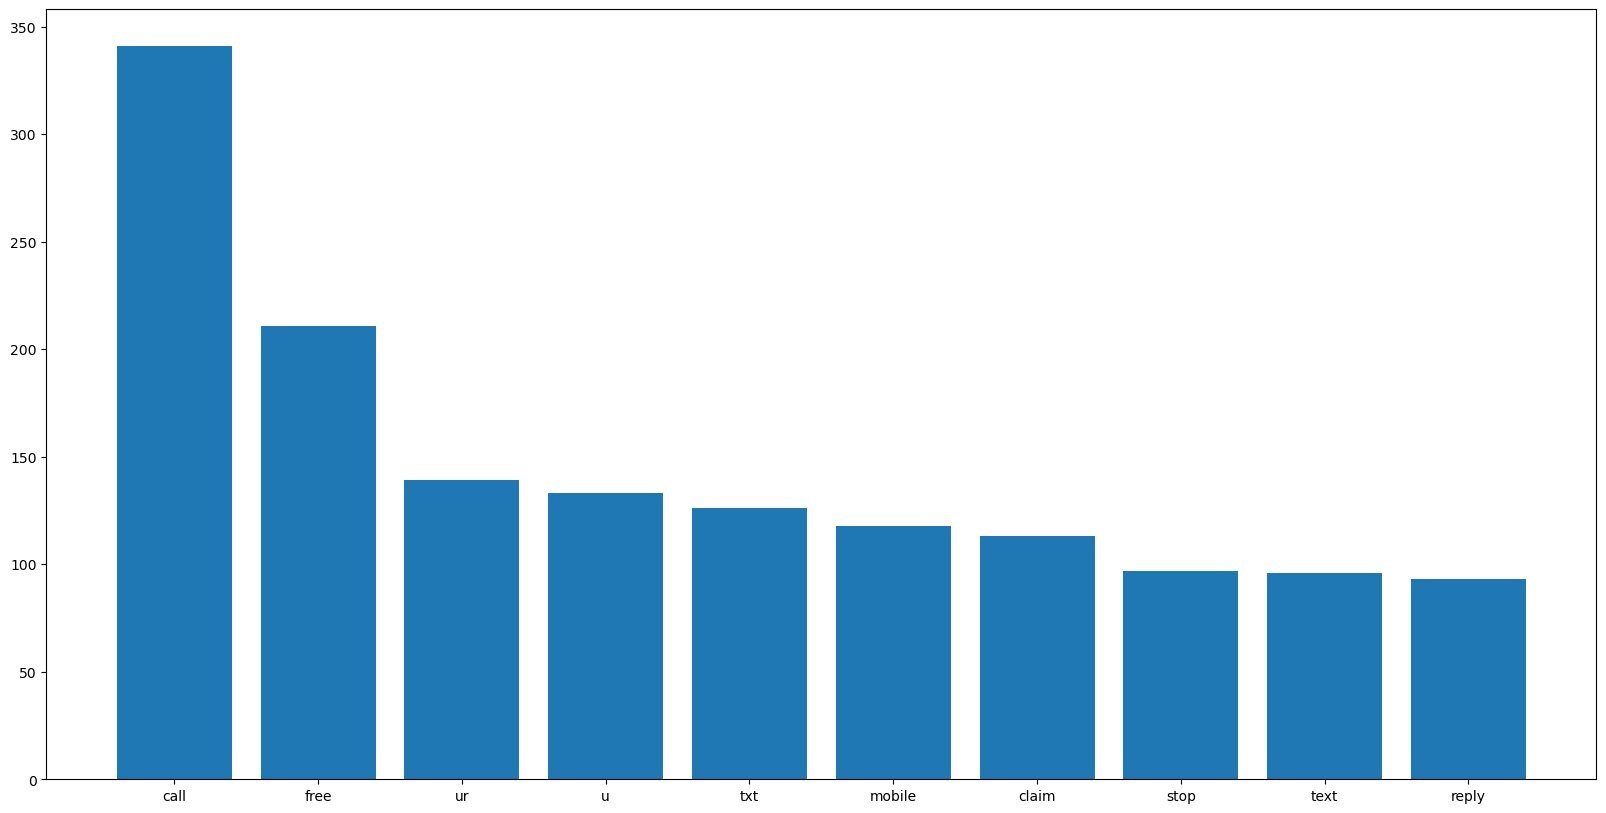

In [18]:
# plt.bar(spam_words_count.most_common(10))


x = spam_words_count.most_common(10)
plt.figure(figsize=(20,10))
# print(x)
plt.bar(
  [y[0] for y in x],
  [y[1] for y in x]
)

plt.show()

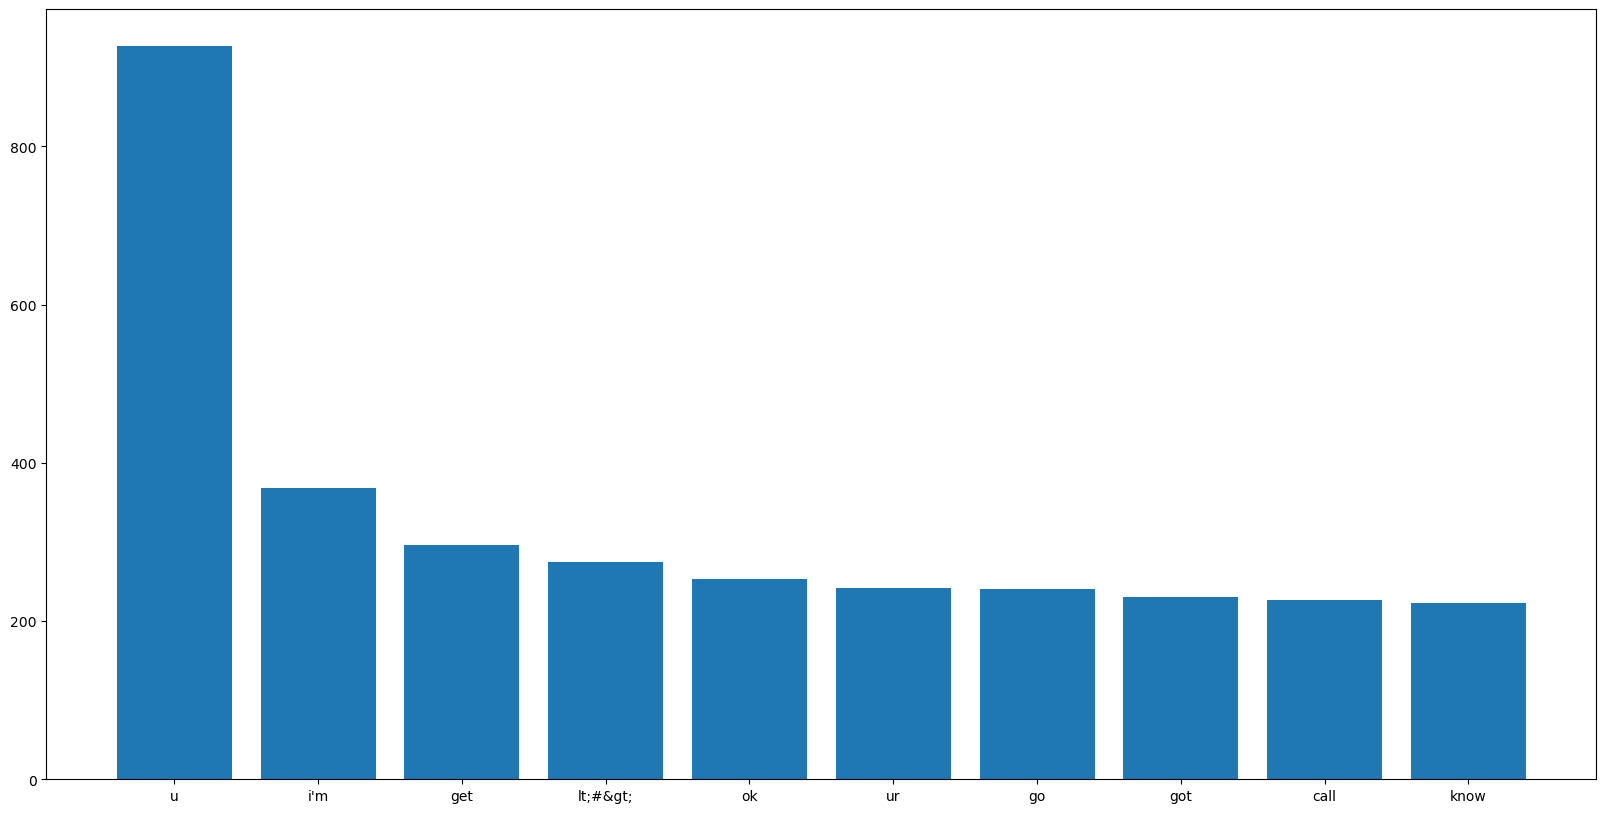

In [19]:

x = non_spam_words_count.most_common(10)
plt.figure(figsize=(20,10))
# print(x)
plt.bar(
  [y[0] for y in x],
  [y[1] for y in x]
)

plt.show()

In [20]:

# accuracy for training dataset

# count = 0

# for row in lst_csv:
#   if row[0] == 'spam' and predict_spam_message(row[1], spam_words, non_spam_words) == 'Spam':
#     count += 1
#   elif row[0] == 'notspam' and predict_spam_message(row[1], spam_words, non_spam_words) == 'Not spam':
#     count += 1


# print(count/len(lst_csv))


In [21]:
def predict_spam_message_using_dictionary(message: str, prob_w_given_spam: dict, prob_w_given_non_spam: dict):
  lst_words = message.split()
  lst_words = [
    word.lower() for word in lst_words
  ]
  predict_spam = 1
  predict_non_spam = 1
  
  # prob_w_given_spam = dict()
  # prob_w_given_non_spam = dict()
  global total_spam_words
  global total_non_spam_words 
  for word in message_words:
    try:
      # if word present in spam_words
      freq_word = spam_words_count[word]
      prob_w_given_spam[word] = freq_word/total_spam_words
    except:
      # if word not in spam words
      prob_w_given_spam[word] = 0.001

    try:
      # if word present in non_spam_words
      freq_word = non_spam_words_count[word]
      prob_w_given_non_spam[word] = freq_word/total_non_spam_words
    except:
      # if word not in non spam words
      prob_w_given_non_spam[word] = 0.001
  prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
  prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)


  for word in lst_words:
    try:
      prob_word_given_spam = prob_w_given_spam[word]
      predict_spam *= prob_word_given_spam
    except:
      predict_spam *= 0.001
    
    try:
      prob_word_given_not_spam = prob_w_given_non_spam[word]
      predict_non_spam *= prob_word_given_not_spam
    except:
      predict_non_spam *= 0.001
    
  predict_spam *= prob_spam
  predict_non_spam *= prob_not_spam

  if predict_spam > predict_non_spam:
    return 'Spam'
  else:
    return 'Not spam'

  

In [22]:

# accuracy for training dataset

# count = 0

# # for row in lst_csv:
# for i in range(len(lst_csv)):
#   row = lst_csv[i]
#   print(i)

#   if row[0] == 'spam' and predict_spam_message_using_dictionary(row[1], prob_w_given_spam, prob_w_given_non_spam) == 'Spam':
#     count += 1
#   elif row[0] == 'notspam' and predict_spam_message_using_dictionary(row[1], prob_w_given_spam, prob_w_given_non_spam) == 'Not spam':
#     count += 1


# print(count/len(lst_csv))


# accuracy is 0.9928519061583577



(d) Test your classifier against 4-5 SMS messages (spam as well as non-spam) that you have received in your mobile phone.

In [23]:
# predict_spam_message(message, spam_words, non_spam_words)

message_in_mobile = [
  'Receive Rs.1500* Bonus',
  'Goibibo: Need to travel to Thekkady? Then book an amazing stay & get upto 25% OFF. Code: GISUPER. Book now. go.ibibo.com/MsUpqC',
  'Hi Neeraj, Rs 30 corner is live for you on bigbasket. Find all the best sellers within Rs 30 here https://u1.mnge.co/33EEQE8',
  'Welcome to Jio-Kerala. Kindly enable Data Roaming to use data services. Data, Voice & SMS benefits will be as per your plan.',
  'Dear Customer, You have a missed call from The last missed call was at 11:51 AM on 24-Feb-2023 Thankyou, Team Jio.',
  "Don't lock if u feel u won't hear when I knock the door",
  "I'm posting it here, so that if someone gets a solution, please post the solution (even if it is done roughly) too, so that everyone can refer to it if they don't get...",
  "As of now it seems best that we just do some background check on the proffs",
]

for m in message_in_mobile:
  print(predict_spam_message(m,spam_words,non_spam_words))


Spam
Spam
Not spam
Not spam
Spam
Not spam
Not spam
Not spam


In [24]:
# z = 0
# for row in test_set:
#   x = predict_spam_message(row[1], spam_words, non_spam_words)
#   if x=='Spam' and row[0] == 'spam':
#     z += 1
#   elif x == 'Not spam' and row[0] == 'notspam':
#     z += 1


# print(z/len(test_set))





In [25]:
import csv, collections, re, math, numpy as np, matplotlib.pyplot as plt

# Binary Town Naive Bayes Classifier  

Consider a town that contains only kids and adults. Each person in this town is associated with two attributes, height and weight that take on values from $\mathbb{R}$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Let $X$ be the random variable denoting a pair of height-weight values and $Y$ be the random variable denoting a person in this town. Let $X_1$ and $X_2$ denote the random variables that take as values $x_1$ and $x_2$ when $X=(x_1,x_2)$.  Assume that $Y$ is a binary random variable that takes on values $kid=0$ or $adult=1$ depending on whether the person is a kid or an adult. The probability that a random person in this town is a kid is given by $P(Y=kid)=pKid$ and the probability that a random person in this town is an adult is given by $P(Y=adult)=pAdult=1-pKid$.

The conditional probability of height and weight given that a person is a kid or adult is given as follows. For $x=(x_1,x_2) \in \mathbb{R}^2$ with $x_1$ denoting the height and $x_2$ denoting the weight,

*   $P(X_1=x_1 ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1)$ and $P(X_2=x_2 ~|~ Y=kid)=f_{\mu_{12},\sigma_{12}}(x_2)$
*   $P(X_1=x_1 ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1)$ and $P(X_2=x_2 ~|~ Y=adult)=f_{\mu_{22},\sigma_{22}}(x_2)$
 
where $f_{\mu,\sigma}(z)=\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \left( \frac{z-\mu}{\sigma} \right)^2}$. As height and weight are conditionally independent given the category, it follows that $P(X=x ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1) f_{\mu_{12},\sigma_{12}}(x_2)$ and $P(X=x ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1) f_{\mu_{22},\sigma_{22}}(x_2)$.


In [26]:

class Kid:
  def __init__(self, i: int, height: float, weight: float = 0) -> None:
    self.kid_name = i
    self.kid_height = height
    self.kid_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


class Adult:
  def __init__(self,i: int, height: int, weight: float = 0) -> None:
    self.adult_name = i
    self.adult_height = height
    self.adult_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


In [27]:
pKid = 0.3

def kid_or_adult_Y(pKid):
  return 0 if np.random.random() < pKid else 1

def random_Y(pKid):
  return 'adult' if kid_or_adult_Y(pKid) else 'kid'

# kid_or_adult_Y(pKid)


In [28]:
def gaussian(mean:float , sd: float):
  return np.random.normal(loc=mean, scale=sd)

In [29]:


# 11
mu_height_given_kid = 2.7
sd_height_given_kid = 1
var_height_given_kid = sd_height_given_kid**2

height_given_kid_mu_sd_tuple = (mu_height_given_kid,sd_height_given_kid)

# 21
mu_height_given_adult = 5
sd_height_given_adult = 1
var_height_given_adult = sd_height_given_adult**2
height_given_adult_mu_sd_tuple = (mu_height_given_adult,sd_height_given_adult)

# 12
mu_weight_given_kid = 20
sd_weight_given_kid = 10
var_weight_given_kid = sd_weight_given_kid**2
weight_given_kid_mu_sd_tuple = (mu_weight_given_kid,sd_weight_given_kid)

# 22
mu_weight_given_adult = 43
sd_weight_given_adult = 10
var_weight_given_adult = sd_weight_given_adult**2
weight_given_adult_mu_sd_tuple = (mu_weight_given_adult,sd_weight_given_adult)



(a) Simulate 1000 people in this town assuming $pKid=.3$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.7,\mu_{12}=20,\mu_{21}=5,\mu_{22}=43$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the bar chart of the valid samples, the histogram of heights across the groups, the histogram of weights across the groups and the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 

In [30]:
def simulate_people_gaussian(
    n: int, 
    height_given_kid_mu_sd_tuple: tuple,
    height_given_adult_mu_sd_tuple: tuple,
    weight_given_kid_mu_sd_tuple: tuple,
    weight_given_adult_mu_sd_tuple: tuple,
    pKid: float
  ):
  # 11
  mu_height_given_kid = height_given_kid_mu_sd_tuple[0]
  sd_height_given_kid = height_given_kid_mu_sd_tuple[1]
  # var_height_given_kid = sd_height_given_kid**2


  # 21
  mu_height_given_adult = height_given_adult_mu_sd_tuple[0]
  sd_height_given_adult = height_given_adult_mu_sd_tuple[1]
  # var_height_given_adult = sd_height_given_adult**2

  # 12
  mu_weight_given_kid = weight_given_kid_mu_sd_tuple[0]
  sd_weight_given_kid = weight_given_kid_mu_sd_tuple[1]
  # var_weight_given_kid = sd_weight_given_kid**2

  # 22
  mu_weight_given_adult = weight_given_adult_mu_sd_tuple[0]
  sd_weight_given_adult = weight_given_adult_mu_sd_tuple[1]
  # var_weight_given_adult = sd_weight_given_adult**2
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height_weight = []
  # tuple containing (name, height, weight)
  for i in range(n):
    # kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    kid_or_adult = np.random.choice(['kid','adult'], p=[pKid,1-pKid],)
    if kid_or_adult == 'kid':
      height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      while height_kid_positive < 0:
        height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)
      while weight_kid_positive < 0:
        weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)

      kid_list.append(Kid(i,height_kid_positive, weight_kid_positive))
      people_name_height_weight.append(
        (i,height_kid_positive,weight_kid_positive)
      )
    else:
      height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      while height_adult_positive < 0:
        height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)
      while weight_adult_positive < 0:
        weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)

      adult_list.append(Adult(i,height_adult_positive, weight_adult_positive))
      people_name_height_weight.append(
        (i,height_adult_positive,weight_adult_positive)
      )
    
  return kid_list, adult_list, people_name_height_weight



In [31]:
total_population = 1000

In [32]:
kid_objects_gaussian, adult_objects_gaussian, people_in_town_gaussian = simulate_people_gaussian(
  total_population,
  height_given_kid_mu_sd_tuple,
  height_given_adult_mu_sd_tuple ,
  weight_given_kid_mu_sd_tuple ,
  weight_given_adult_mu_sd_tuple,
  pKid=0.3
)

In [33]:
kid_names = [
  isinstance(kid, Kid) and kid.kid_name for kid in kid_objects_gaussian
]

heights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_height for kid in kid_objects_gaussian
]
weights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_weight for kid in kid_objects_gaussian
]

adult_names = [
  isinstance(adult, Adult) and adult.adult_name for adult in adult_objects_gaussian
]

heights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_gaussian
]
weights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_weight for adult in adult_objects_gaussian
]


In [34]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, heights_of_kid_gaussian, color = 'blue', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')

# # plt.title('Person vs ')
# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Height')
# plt.show()

In [35]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, weights_of_kid_gaussian, color = 'blue', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')
# # plt.bar(adult_names, weights_of_adult_gaussian, color = 'green')

# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Weights')
# plt.show()

In [36]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, heights_of_adult_gaussian, color = 'blue')
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')


# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Heights')
# plt.show()

In [37]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, weights_of_adult_gaussian, color = 'blue')
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')


# # plt.title('Histogram of Heights')
# plt.xlabel('Weights')
# plt.ylabel('Frequency')
# plt.show()

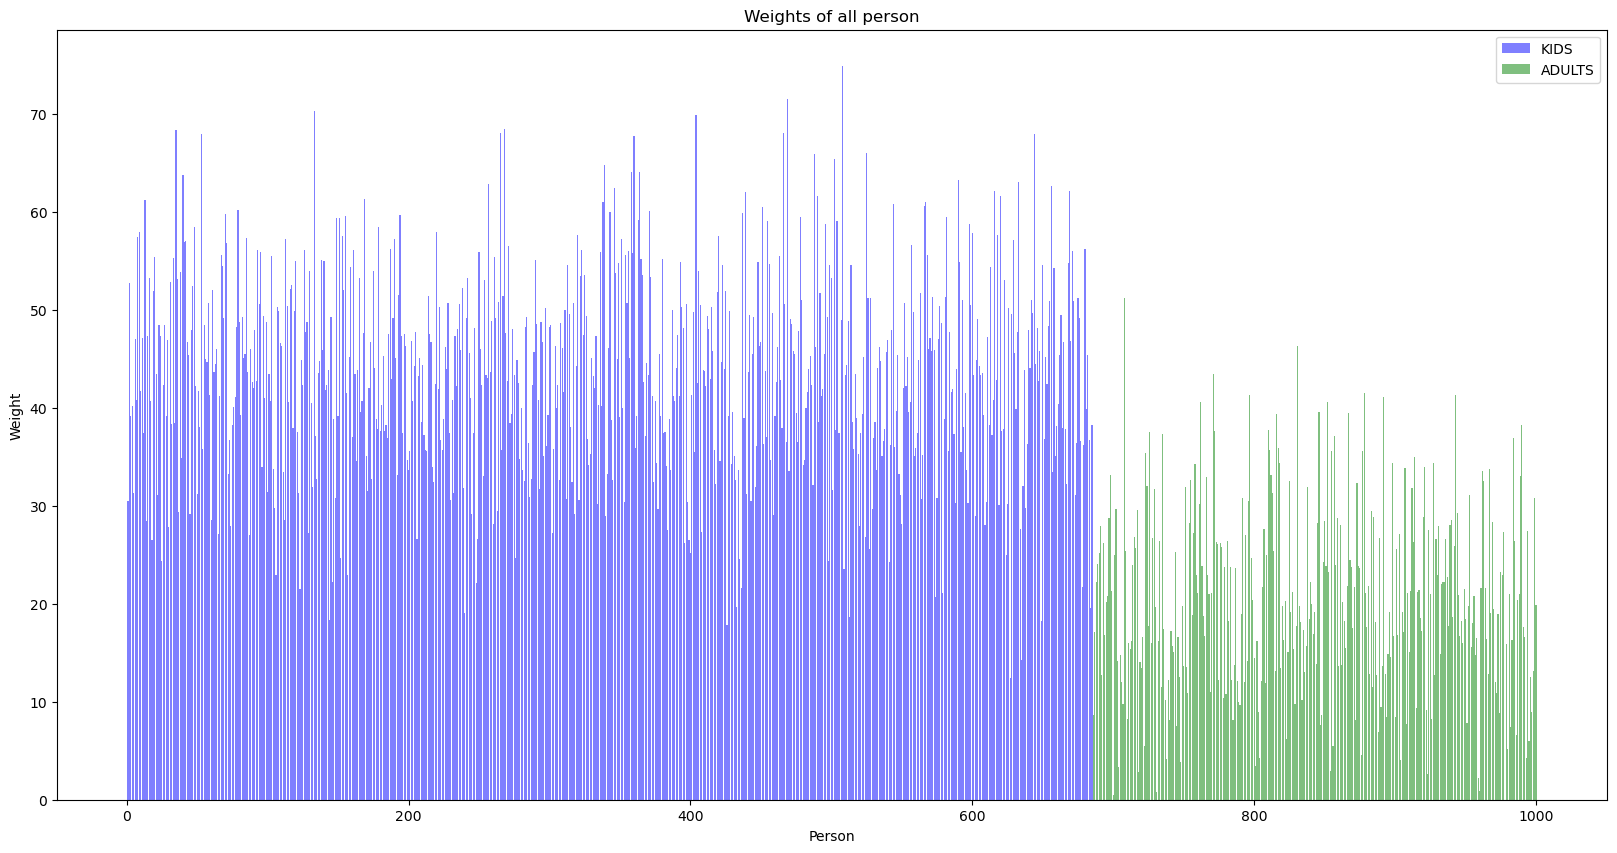

In [38]:
plt.figure(figsize=(20,10))
# plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# plt.bar(heights_of_kid_gaussian)
# plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


# bar chart of names vs weight
# plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, weights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5)
# plt.bar(kid_names, weights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5)

plt.bar([
  i+1 for i in range(len(weights_of_adult_gaussian))
], weights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5
)
plt.bar([
  i+1 for i in range(len(weights_of_adult_gaussian), len(weights_of_kid_gaussian)+len(weights_of_adult_gaussian))
], weights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5
)

plt.legend(loc = 'upper right')

# plt.title('Histogram of Heights')
plt.xlabel('Person')
plt.ylabel('Weight')
plt.title('Weights of all person')
plt.show()

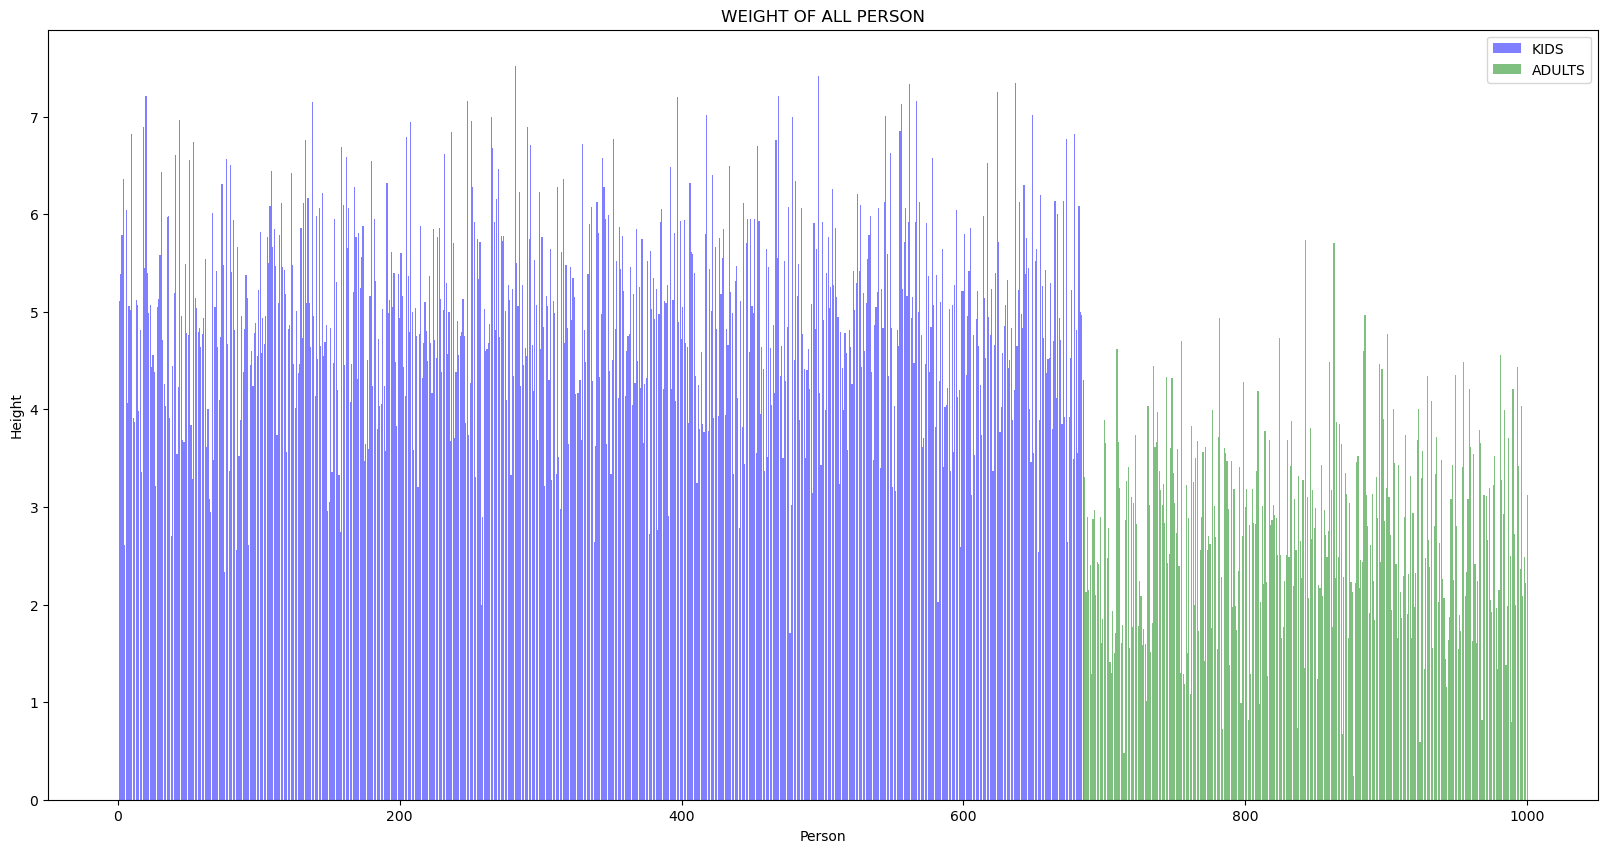

In [39]:
plt.figure(figsize=(20,10))
# plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# plt.bar(heights_of_kid_gaussian)
# plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


# bar chart of names vs heights
# plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, heights_of_kid_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')
# plt.bar(adult_names, heights_of_adult_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5)



plt.bar([
  i+1 for i in range(len(heights_of_adult_gaussian))
], heights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5
)
plt.bar([
  i+1 for i in range(len(heights_of_adult_gaussian), len(heights_of_kid_gaussian)+len(heights_of_adult_gaussian))
], heights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5
)


plt.legend(loc = 'upper right')
# plt.title('Histogram of Heights')
plt.xlabel('Person')
plt.ylabel('Height')
plt.title('WEIGHT OF ALL PERSON')
plt.show()

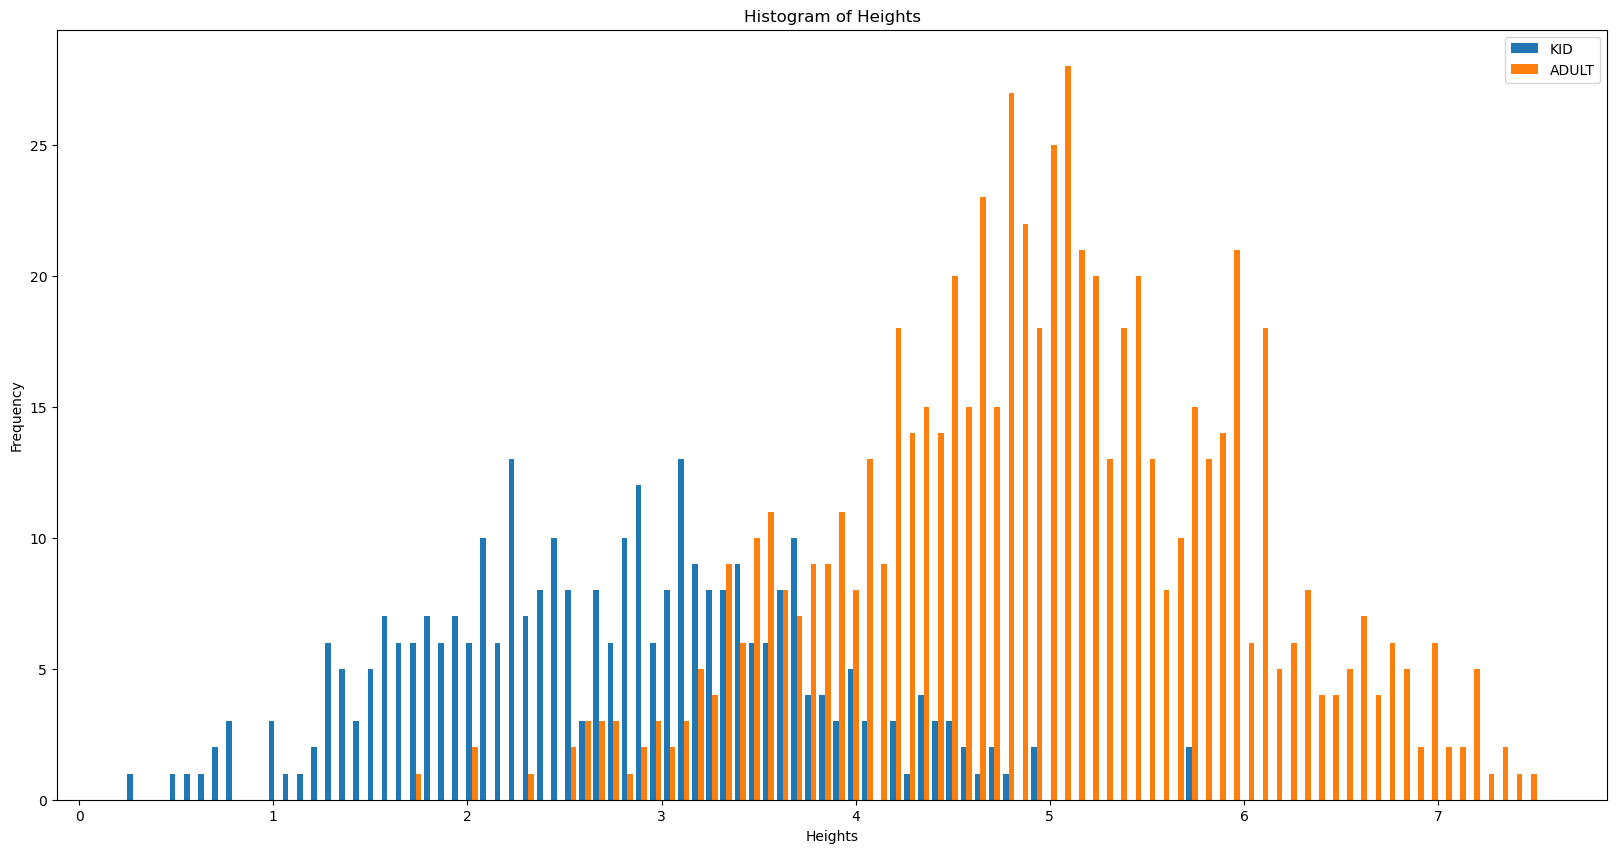

In [40]:
plt.figure(figsize=(20,10))
plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


plt.title('Histogram of Heights')
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.show()




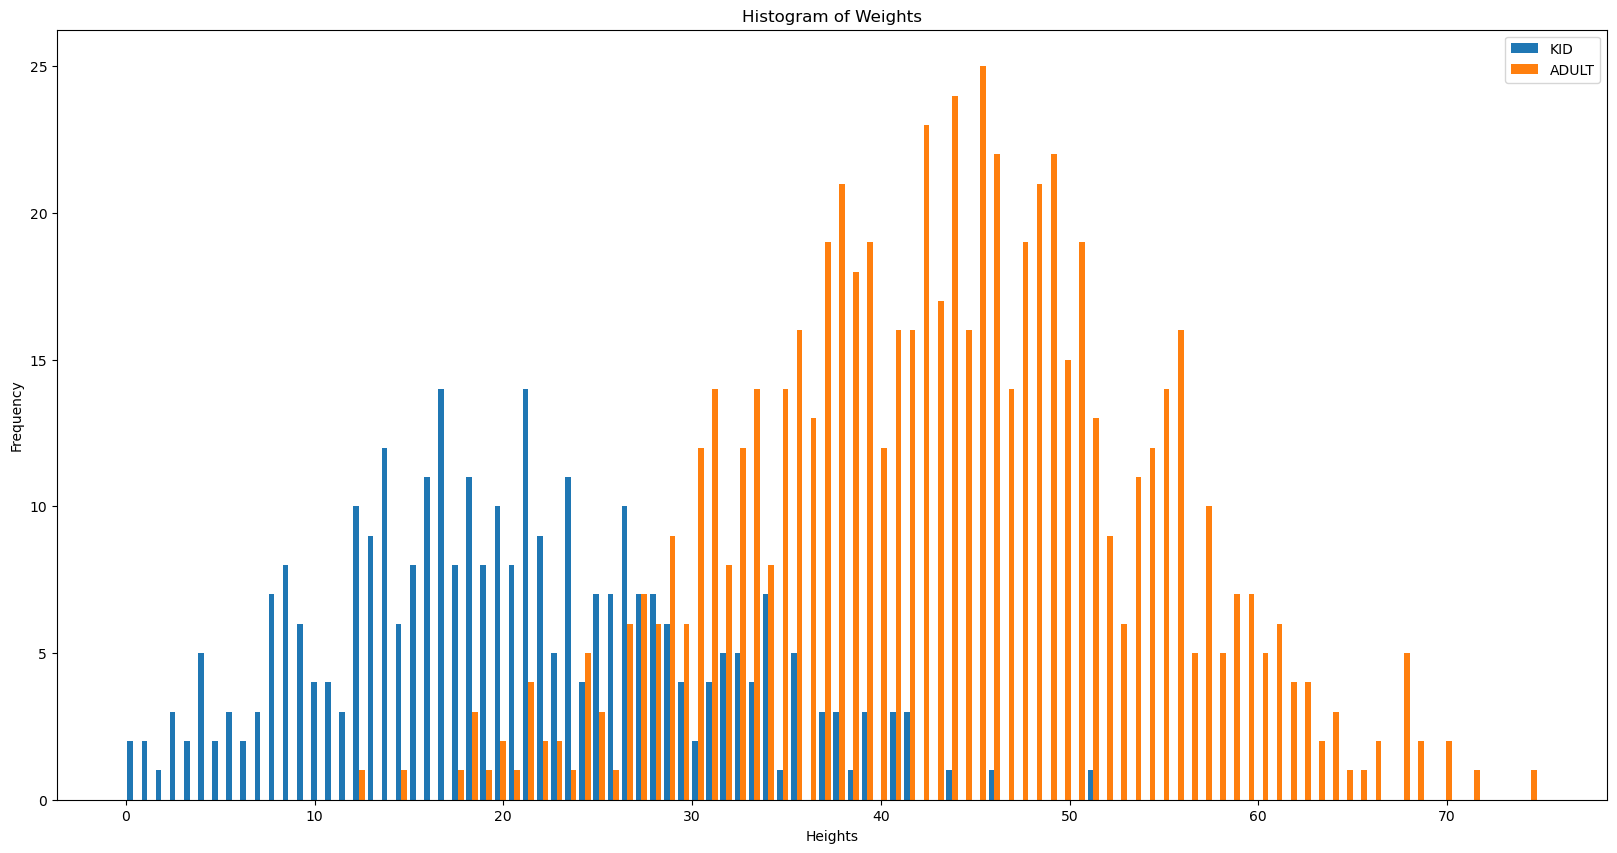

In [41]:
plt.figure(figsize=(20,10))
plt.hist([weights_of_kid_gaussian,weights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


plt.title('Histogram of Weights')
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.show()

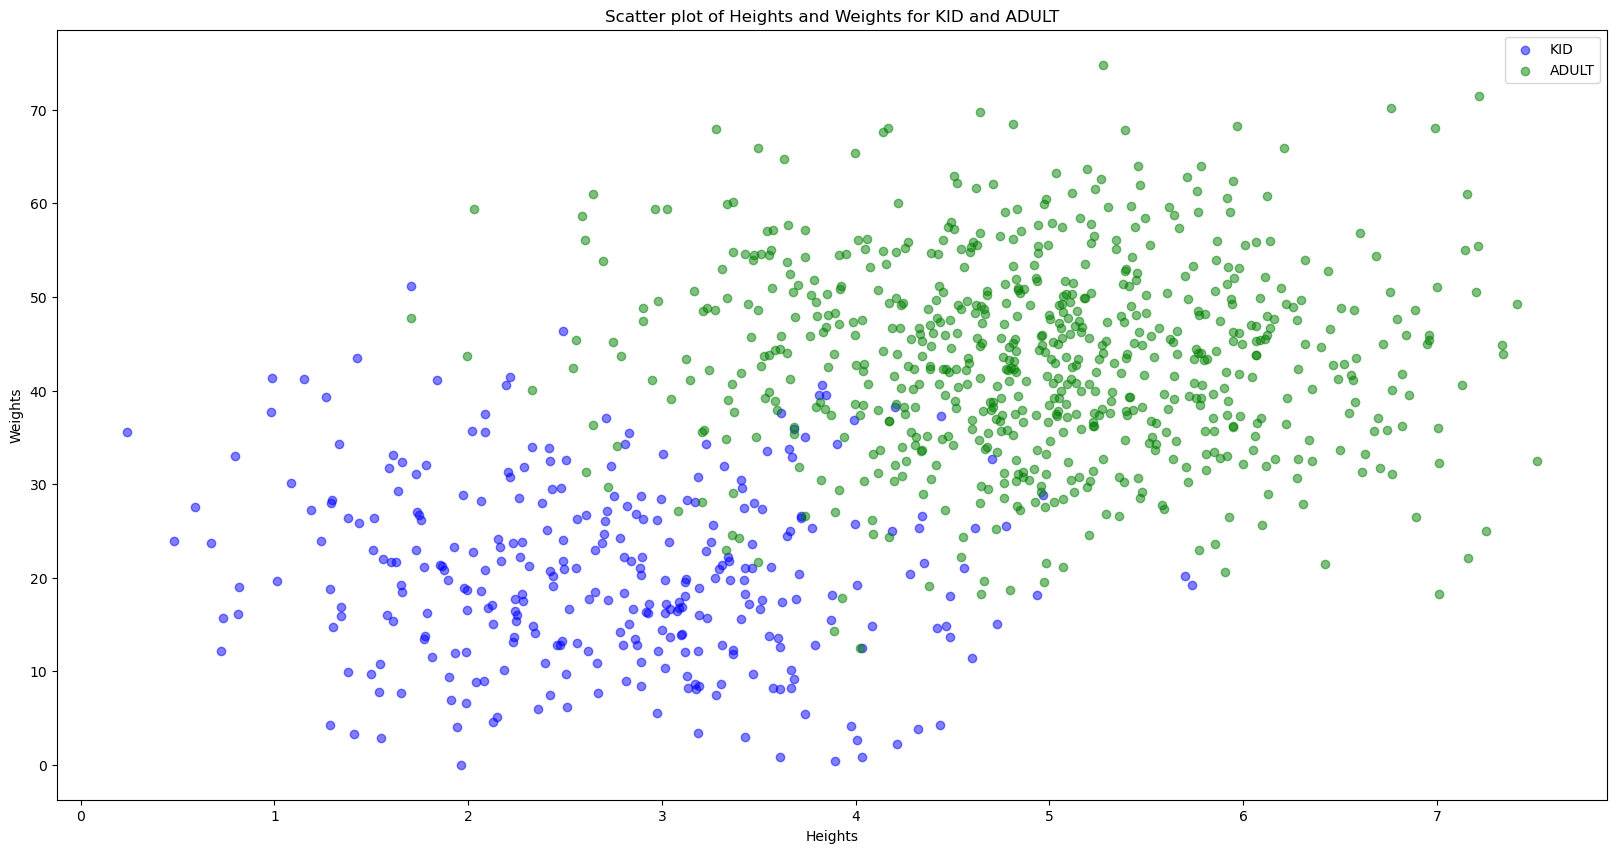

In [42]:
plt.figure(figsize=(20,10))

plt.scatter(heights_of_kid_gaussian, weights_of_kid_gaussian, color = 'blue', alpha=0.5, label = 'KID')

plt.scatter(heights_of_adult_gaussian, weights_of_adult_gaussian, color = 'green', alpha=0.5, label = 'ADULT')


plt.xlabel('Heights')
plt.ylabel('Weights')
# plt.xticks(np.arange(0,8.25,0.25))
# plt.yticks(np.arange(0,75,5))
plt.title('Scatter plot of Heights and Weights for KID and ADULT')
plt.legend(loc='upper right')
plt.show()


In [43]:
def gaussian_function(z: float, mean:float , std: float):
  pi = np.pi
  e = np.e
  return np.power(
    e, (-0.5) * (((z - mean)/std)**2)
  )/(std*(np.sqrt(2*pi)))



In [44]:
# np.power(2,3)

# gaussian_function(0,0,1) == 1/np.sqrt(np.pi * 2)

(b) Implement an agent that observes the 1000 samples generated in part (a) and computes the fraction $pK$ of kids. Observe that $pK$ is an estimate on $pKid$. Compute the mean and standard deviation of heights and weights for samples that are kids. These values $\mu'_{11},\sigma'_{11},\mu'_{12}$ and $\sigma'_{12}$ are the estimates for $\mu_{11},\sigma_{11},\mu_{12}$ and $\sigma_{12}$. Compute similar estimates $\mu'_{21},\sigma'_{21},\mu'_{22}$ and $\sigma'_{22}$ for $\mu_{21},\sigma_{21},\mu_{22}$ and $\sigma_{22}$.



(c) Implement an agent that classifies each sample generated in part (a) as kid or adult using the estimates computed in part (b) and Bayes' Rule. That is, the classification of a person with attributes $x=(x_1,x_2)$ into $adult$ or $kid$ is based on the values $pK \cdot f_{\mu'_{11},\sigma'_{11}}(x_1) f_{\mu'_{12},\sigma'_{12}}(x_2)$ and $(1-pK) \cdot f_{\mu'_{21},\sigma'_{21}}(x_1) f_{\mu'_{22},\sigma'_{22}}(x_2)$. Measure the accuracy of the classifier. Give the scatter plot of the 1000 samples (height in the X-axis and weight in the Y-axis) by coloring the correctly classified ones in one color and the others in another color. 





In [45]:


class Agent:
  def __init__(self, samples: list) -> None:

    # sample list is list of objects

    kid_list = [
      element for element in samples if isinstance(element, Kid)
    ]
    self.kid_list = kid_list
    adult_list = [
      element for element in samples if isinstance(element, Adult)
    ]
    self.adult_list = adult_list
    # print(kid_list)
    # print(adult_list)

    self.samples = samples

    countKid = 0
    for object in samples:
      if isinstance(object, Kid):
        countKid += 1

    self.pK = countKid/len(samples)
    # estimate on pKid

    self.mean_height_kid = np.mean([isinstance(x, Kid) and x.kid_height for x in kid_list])
    self.mean_height_adult = np.mean([isinstance(x, Adult) and x.adult_height for x in adult_list])
    self.mean_weight_kid = np.mean([isinstance(x, Kid) and x.kid_weight for x in kid_list])
    self.mean_weight_adult = np.mean([isinstance(x, Adult) and x.adult_weight for x in adult_list])


    # print([
    #   self.mean_height_kid,self.mean_height_adult, self.m
    # ])
    # print([isinstance(x, Kid) and x.kid_height for x in kid_list])
    


    self.std_height_kid = np.std([isinstance(x, Kid) and x.kid_height for x in kid_list])
    self.std_height_adult = np.std([isinstance(x, Adult) and x.adult_height for x in adult_list])
    self.std_weight_kid = np.std([isinstance(x, Kid) and x.kid_weight for x in kid_list])
    self.std_weight_adult = np.std([isinstance(x, Adult) and x.adult_weight for x in adult_list])



    # print([
    #   self.std_height_kid, self.std_height_adult, self.std_weight_kid, self.std_weight_adult
    # ])
    

  def naive_bayes_classifier(self):
    check_dictionary = dict()
    for element in self.samples:
      if isinstance(element, Kid):
        check_dictionary[element.kid_name] = (0,element)
        # 0 if Kid
      elif isinstance(element, Adult):
        check_dictionary[element.adult_name] = (1, element)
        # 1 if adult

    # lst_height_weight

    correct_count = 0
    correctly_classified_objects = []
    incorrectly_classified_objects = []

    pK = self.pK

    for element in self.samples:
      if isinstance(element, Kid):
        height = element.kid_height
        weight = element.kid_weight

        a = gaussian_function(height, self.mean_height_kid, self.std_height_kid)
        b = gaussian_function(weight, self.mean_weight_kid, self.std_weight_kid)
        c = gaussian_function(height, self.mean_height_adult, self.std_height_adult)
        d = gaussian_function(weight, self.mean_weight_adult, self.std_weight_adult)

        predict_kid = pK * a * b
        predict_adult = (1-pK) * c * d

        if predict_kid > predict_adult:
          # predicting kid as Kid
          correct_count += 1
          correctly_classified_objects.append(element)

        else:
          # predicting kid as adult
          incorrectly_classified_objects.append(element)
      
      elif isinstance(element, Adult):
        height = element.adult_height
        weight = element.adult_weight

        a = gaussian_function(height, self.mean_height_kid, self.std_height_kid)
        b = gaussian_function(weight, self.mean_weight_kid, self.std_weight_kid)
        c = gaussian_function(height, self.mean_height_adult, self.std_height_adult)
        d = gaussian_function(weight, self.mean_weight_adult, self.std_weight_adult)

        predict_kid = pK * a * b
        predict_adult = (1-pK) * c * d

        if predict_adult > predict_kid:
          # predicting adult as adult
          correct_count += 1
          correctly_classified_objects.append(element)

        else:
          # predicting adult as kid
          incorrectly_classified_objects.append(element)
    
    print(f'The accuracy of Naive Bayes Classifier is {correct_count/len(self.samples)}')

    plt.figure(figsize=(20,10))
    

    correctly_classified_heights = []
    correctly_classified_weights = []
    incorrectly_classified_heights = []
    incorrectly_classified_weights = []

    for element in correctly_classified_objects:
      if isinstance(element, Kid):
        correctly_classified_heights.append(element.kid_height)
        correctly_classified_weights.append(element.kid_weight)
      elif isinstance(element, Adult):
        correctly_classified_heights.append(element.adult_height)
        correctly_classified_weights.append(element.adult_weight)
    for element in incorrectly_classified_objects:
      if isinstance(element, Kid):
        incorrectly_classified_heights.append(element.kid_height)
        incorrectly_classified_weights.append(element.kid_weight)
      elif isinstance(element, Adult):
        incorrectly_classified_heights.append(element.adult_height)
        incorrectly_classified_weights.append(element.adult_weight)

    
    
    plt.figure(figsize=(20,10))

    plt.scatter(correctly_classified_heights, correctly_classified_weights, color = 'green', alpha=0.5, label = 'CORRECT')

    plt.scatter(incorrectly_classified_heights, incorrectly_classified_weights, color = 'red', alpha=0.5, label = 'INCORRECT')


    plt.xlabel('Heights')
    plt.ylabel('Weights')
    # plt.xticks(np.arange(0,8.25,0.25))
    # plt.yticks(np.arange(0,75,5))
    plt.title('Naive Bayes Classifier Scatter Plot')
    plt.legend(loc='upper right')
    plt.show()



The accuracy of Naive Bayes Classifier is 0.951


<Figure size 2000x1000 with 0 Axes>

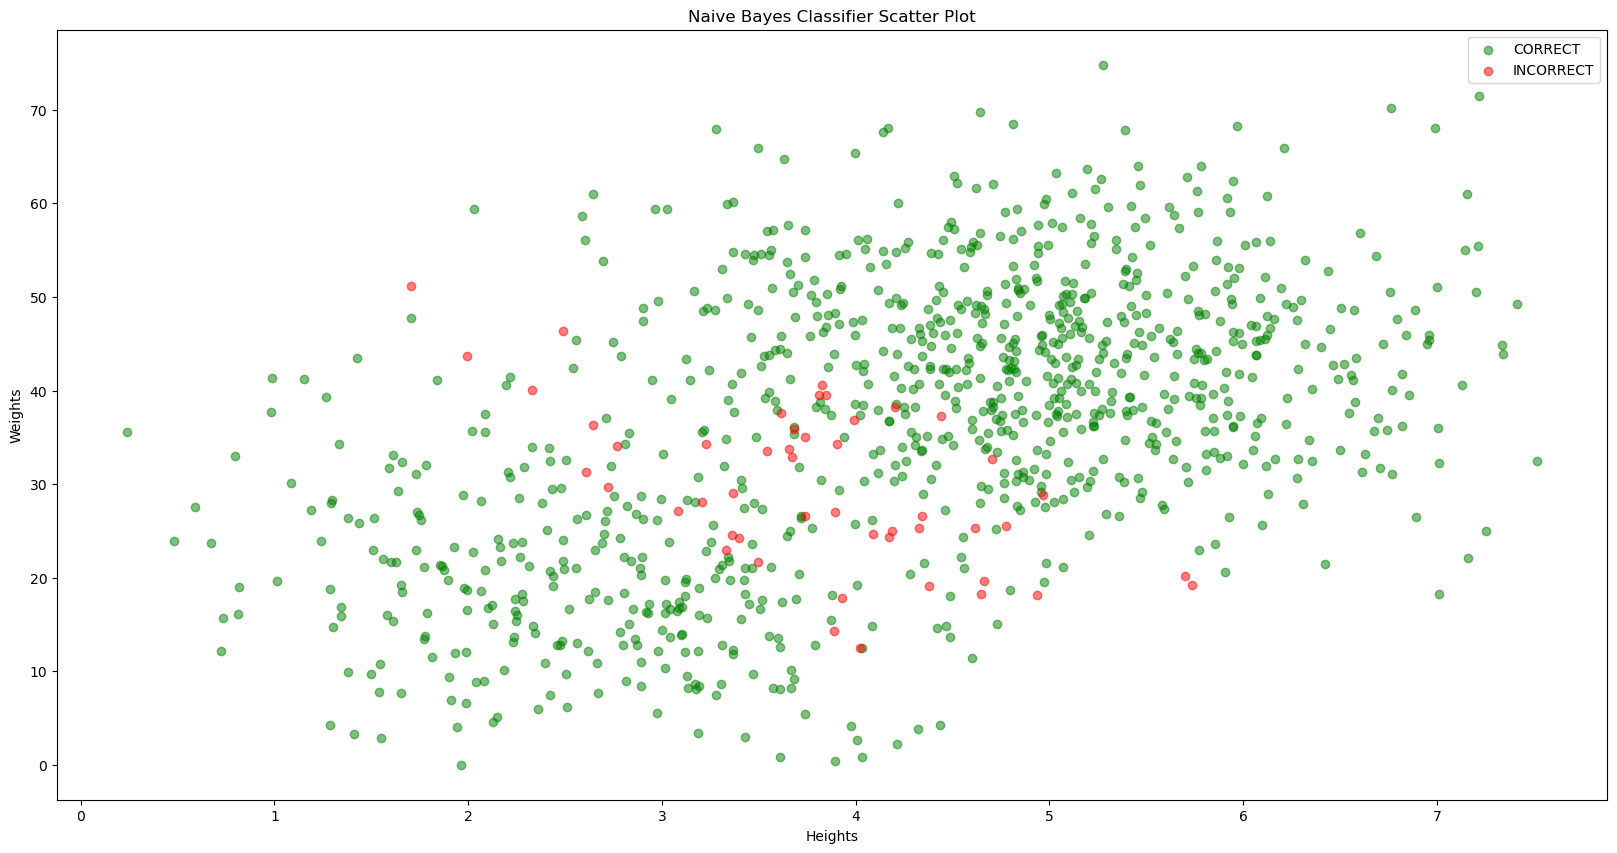

In [46]:
agent = Agent([*kid_objects_gaussian, *adult_objects_gaussian])
agent.naive_bayes_classifier()

In [47]:
import csv, collections, re, math, numpy as np, matplotlib.pyplot as plt


In [48]:

class Vertex:
  def __init__(self, variable_name: int) -> None:
    self.variable = variable_name
    self.cpt_table = None
  
  def set_cpt_table(self, cpt: dict()):
    self.cpt_table = cpt
    





In [49]:
class Bayesian_Network:
  def __init__(self,file_path: str) -> None:
    lines = []
    with open(file_path, 'r') as file:
      lines = file.readlines()
    if not lines:
      print('File is Empty')
      return
    num_lines = len(lines)
    for i in range(num_lines):
      lines[i] = lines[i].strip('\n')
    parent_dictionary = dict()

    self.distribution = dict()
    line_index = 0
    while line_index < num_lines:
      if line_index == 0:
        num_of_variables = int(lines[line_index])
        self.number_of_variables = num_of_variables
        adj_dictionary = dict()
        vertices_dictionary = dict()
        for i in range(num_of_variables):
          adj_dictionary[i+1] = set()
          vertices_dictionary[i+1] = Vertex(i+1)
        self.adj_dictionary = adj_dictionary
        self.vertices_dictionary = vertices_dictionary

        line_index += 1
      else:
        name, *parent_list = map(int, lines[line_index].split())
        if not parent_list:
          cpt = dict()
          # index = 1
          # for j in range(2)
          line_index += 1
          prob_dist = list(map(float, lines[line_index].split()))
          cpt[((name,),())] = prob_dist[0]
          cpt[((-name,),())] = prob_dist[1]
          vertex = self.vertices_dictionary[name]
          if isinstance(vertex, Vertex):
            vertex.set_cpt_table(cpt)
          line_index += 1
          self.distribution.update(cpt)
          parent_dictionary[name] = []
          continue
        else:
          index = 2**len(parent_list)-1
          line_index += 1
          cpt = dict()
          
          while index > -1:
            # cpt[((name),())]
            key_in_binary = bin(index)[2:].zfill(len(parent_list))
            lst = list(map(float, lines[line_index].split()))
            truth_values = [
              int(parent_list[i]) if int(key_in_binary[i]) else -(int(parent_list[i])) for i in range(len(key_in_binary))
            ]
            cpt[(tuple([name]), tuple(truth_values))] = lst[0]
            cpt[(tuple([-name]), tuple(truth_values))] = lst[1]
            index -= 1
            line_index += 1
          vertex = self.vertices_dictionary[name]
          if isinstance(vertex, Vertex):
            vertex.set_cpt_table(cpt)

          [
            self.addEdge(parent, name) for parent in  parent_list
          ]
          parent_dictionary[name] = list(parent_list)
          self.distribution.update(cpt)
          continue
    self.parent_dictionary = parent_dictionary



        
    # self.time = 0
    self.topo_list = []
    self.isVisited = dict()
    for i in range(num_of_variables):
      self.isVisited[i+1] = False
    self.topo_ordering()

    
    # for key, value in self.vertices_dictionary:


  def topo_ordering(self):
    for i in range(self.number_of_variables):
      if self.isVisited[i+1] == False:
        # print('going to ', i+1)
        self.dfs_explore(i+1)

    self.topo_list.reverse()

  def dfs_explore(self, vertex: int):
    # self.time += 1
    # print('came to ', vertex)
    neighbours = self.adj_dictionary[vertex]
    self.isVisited[vertex] = True
    # print(neighbours)
    for neighbour in list(neighbours):

      if self.isVisited[neighbour] == False:
        # print(f'going to {neighbour}')
        self.dfs_explore(neighbour)
    # print(f'returning from {vertex}')
    self.topo_list.append(vertex)
    # print(self.topo_list)

  def print_topo_ordering(self):
    print(self.topo_list)

  def print_network(self):
    for key, value in self.vertices_dictionary.items():
      print('Variable is ', key)
      if isinstance(value, Vertex):
        z = value.cpt_table
        if isinstance(z, dict):
          for a,b in z.items():
            print(a,b)



    # self.read_file(file_path)

  def print_adj_dictionary(self):
    for key, value in self.adj_dictionary.items():
      print(key, value)

  def addEdge(self, x: int, y: int):
    # edge from x to y
    try:
      z = self.adj_dictionary[x]
      if isinstance(z, set):
        z.add(y)
    except:
      print(f'No such vertex named {x}')
  
  # def read_file(self, file_path: str):

  def parents(self, vertex: int):
    try:
      x = self.parent_dictionary[vertex]
      return x
    except:
      return None
    
  def prior_sample(self):
    topo_list = self.topo_list
    x = [None for _ in range(self.number_of_variables + 1)]
    # print(topo_list)
    table = self.distribution
    for vertex in topo_list:
      parent_list = self.parents(vertex)
      # print(parent_list)
      if not parent_list:
        prior_prob_vertex = table[((vertex,), ())]
        isTrue = np.random.choice(a=[True, False], p=[prior_prob_vertex,1-prior_prob_vertex])
        # print(isTrue)
        if isTrue:
          x[vertex] = vertex
        else:
          x[vertex] = -vertex
        # print(x[vertex])
      else:
        key_required_set = set(
          [
            x[parent] for parent in parent_list
          ]
        )
        # print(key_required_set)
        for key in self.distribution.keys():
          if key[0] == tuple([vertex]) and set(key[1]) == key_required_set:
            # print(key)
            prob_v_given_parents = table[key]
            isTrue = np.random.choice(a=[True, False], p=[prob_v_given_parents,1-prob_v_given_parents])
            if isTrue:
              x[vertex] = vertex
            else:
              x[vertex] = -vertex
            break
    return x[1:]
          


  def rejection_sampling(self,query_list: list, evidence_list: list, n: int):
    q_set = set(query_list)
    e_set = set(evidence_list)

    consistent_samples = []

    for _ in range(n):
      x = self.prior_sample()
      evidence_set_obtained = set()
      for index in evidence_list:
        evidence_set_obtained.add(x[abs(index) - 1])
      if evidence_set_obtained == e_set:
        consistent_samples.append(x)

    count = 0
    total_consistent_samples = len(consistent_samples)
    for sample in consistent_samples:
      query_set_obtained = set()
      for index in query_list:
        query_set_obtained.add(sample[abs(index) - 1])
        if query_set_obtained == q_set:
          count += 1
    del consistent_samples
    return count/total_consistent_samples      
  
    
  def variable_elimination(self, query_list: list, evidence_list: list):
    q_set = set(query_list)
    e_set = set(evidence_list)
    non_e_set = set([
      -variable for variable in evidence_list
    ])
    initial_factors = dict()
    for key in self.distribution.keys():
      # print(e_set, key[1])
      check_set = set(key[1])

      if not check_set:
        initial_factors[key] = self.distribution[key]
        continue
      
      isContinue = False
      for v in e_set:
        if -v in check_set:
          isContinue = True
          break
      if isContinue:
        continue
      else:
        initial_factors[key] = self.distribution[key]

      
      # for truth_value in e_set:
      #   if -truth_value in check_set:
      #     del check_set
      #     continue
      # initial_factors[key] = self.distribution[key]

      del check_set
    # print(initial_factors)
    # for key, value in initial_factors.items():
    #   print(key, value)

    # finding the hidden variables
    variable_set = set(
      [
        i+1 for i in range(self.number_of_variables)
      ]
    )
    evidence_variables = set(
      [
        abs(variable) for variable in evidence_list
      ]
    )

    query_variables = set(
      [
        abs(variable) for variable in query_list
      ]
    )


    hidden_variables = variable_set.difference(evidence_variables.union(query_variables))
    # print(hidden_variables)

    # for a,b in initial_factors.items():
    #   print(a,b)

    while hidden_variables:
      h = hidden_variables.pop()
      print(h)
      factors_containing_true_h = dict()
      factors_containing_false_h = dict()
      for key in initial_factors.keys():
        # print(key)
        a = set(key[0])
        b = set(key[1])
        # print(a,b)
        if h in a or h in b:
          factors_containing_true_h[key] = initial_factors[key]
        elif -h in a or -h in b:
          factors_containing_false_h[key] = initial_factors[key]
        # else:
        #   factors_containing_true_h[key] = self.distribution[key]
        #   factors_containing_false_h[key] = self.distribution[key]
      for c,d in factors_containing_true_h.items():
        print(c,d)
      print()
      for c,d in factors_containing_false_h.items():
        print(c,d)

      break

  def check_present(self, a: set, b: set):
    check = set([
      -v for v in a
    ])
    for x in check:
      if x in b:
        return False
    return True

  def variable_enumeration(self, query_list: list, evidence_list: list):
    # X = [abs(x) for x in query_list]
    return self.enumeration_ask(query_list, evidence_list)


  def enumeration_ask(self, X: list, e: list) -> float:
    Q_distribution = dict()
    absolute_X = [
      abs(x) for x in X
    ]
    number_of_truth_values = 2**len(X)
    length = len(X)
    lst_of_truth_values = [
      bin(i)[2:].zfill(length) for i in range(number_of_truth_values - 1, -1, -1)
    ]
    # print(lst_of_truth_values)
    variables_of_network = self.topo_list
    # variables_of_network.extend([
    #   -i-1 for i in range(self.number_of_variables)
    # ])
    for truth_value in lst_of_truth_values:
      key_list = [
        absolute_X[i] if int(truth_value[i])  else -absolute_X[i] for i in range(len(truth_value))
      ]
      # print(key_list)


      # some problem here
      Q_distribution[tuple(key_list)] = self.enumerate_all(variables_of_network,list(set([*e, *key_list])))
    

    normalization_constant = sum(Q_distribution.values())
    numerator = 0
    for key in Q_distribution.keys():
      if set(key) == set(X):
        numerator = Q_distribution[key]
        break

    # print(Q_distribution)
    del Q_distribution
    # print(numerator, normalization_constant)
    return numerator/normalization_constant





  def enumerate_all(self, variables: list, e: list):
    # print(variables, e)
    if not variables:
      return 1
    y = variables[0]
    if y in e and -y in e:
      return 0
    if y in e:
      # print('y in e')
      for key in self.distribution.keys():
        # print(3)
        if key[0] == tuple([y]):
          # print('here')
          return self.distribution[key] * self.enumerate_all(variables[1:], e)
    elif -y in e:
      # print('-y in e')
      for key in self.distribution.keys():
        # print(3)
        if key[0] == tuple([-y]):
          # print('here negation')
          return self.distribution[key] * self.enumerate_all(variables[1:], e)
    else:
      for key in self.distribution.keys():
        if key[0] == tuple([abs(y)]):
          return self.distribution[key] * self.enumerate_all(variables[1:], list(set([*e, *key[0]]))) + self.distribution[((-abs(y),), key[1])] * self.enumerate_all(variables[1:], list(set([*e, abs(key[0][0])])))
    



In [50]:
g2 = Bayesian_Network('./Baynes_net_optional_files/7_b3.txt')

In [51]:
# g2.variable_enumeration([7],[-2,3,5])

In [52]:
g = Bayesian_Network('./Baynes_net_optional_files/7_b1.txt')

In [53]:
# giving wrong answer
g.variable_enumeration(query_list=[2,3], evidence_list=[1])

0.25

In [54]:
# g.prior_sample()

In [55]:
# g.rejection_sampling(query_list=[-1,-2,-4,-5], evidence_list=[], n = int(1000))

In [56]:
g.topo_list

[1, 3, 5, 2, 4]

In [57]:
# g.variable_elimination(query_list=[4,5], evidence_list=[-1,2])

In [58]:
# g3 = Bayesian_Network('./Baynes_net_optional_files/7_b2.txt')

In [59]:
# g3.variable_elimination(query_list=[5], evidence_list=[2,3,4])

In [60]:
# g.variable_elimination(query_list=[5], evidence_list=[2,3,4])

In [61]:
a = (1,2,)
print(*a)
lst = [*a]
print(lst)

1 2
[1, 2]


In [62]:
def answer(bn_file_path: str, q_file_path: str, ans_file_path: str):
  graph = Bayesian_Network(bn_file_path)
  with open(q_file_path, 'r') as q_file:
    with open(ans_file_path,'w') as ans_file:
      question = q_file.readline()
      while question:
        question_list = question.split()
        # print(question_list)
        
        q_index = question_list.index('q')
        e_index = question_list.index('e')
        # print(q_index, e_index)
        # print(question_list[q_index+1:e_index])
        # print(question_list[e_index+1:])
        query_list = [
          -int(variable[1:]) if variable[0] == '~' else int(variable) for variable in question_list[q_index+1:e_index]
        ]
        evidence_list = [
          -int(variable[1:]) if variable[0] == '~' else int(variable) for variable in question_list[e_index+1:]
        ]
        if question_list[0] == 've':
          try:
            ans_file.write(str(graph.variable_enumeration(query_list, evidence_list))+'\n')
          except:
            ans_file.write(str(query_list) + str(evidence_list)+'\n')
            print(query_list, evidence_list)
        elif question_list[0] == 'rs':
          z = graph.rejection_sampling(query_list, evidence_list, 1000)
          ans_file.write(str(z) + '\n')
          # print(z, graph.variable_enumeration(query_list,evidence_list))
        question = q_file.readline()

In [63]:
answer('./Baynes_net_optional_files/7_b1.txt','./Baynes_net_optional_files/7_q1.txt','./Baynes_net_optional_files/7_a1.txt')

In [64]:
answer('./Baynes_net_optional_files/7_b2.txt','./Baynes_net_optional_files/7_q2.txt','./Baynes_net_optional_files/7_a2.txt')

In [65]:
answer('./Baynes_net_optional_files/7_b3.txt','./Baynes_net_optional_files/7_q3.txt','./Baynes_net_optional_files/7_a3.txt')

[7] [-2, 3, 5]
